# Qiskit használata python programozási nyelven

__Motiváció:__ <br>
Eddig drag & drop módszerrel készítettünk kvantumáramköröket. Ennek nagy hátránya, hogy bonyolultabb áramkörök esetén az áramkörök mások általi reprodukálása időigényes és nehézkes tud lenni. A megoldás az, hogy az áramköröket valamilyen program nyelv segítségével hozzuk létre (jelen esetben ez a python). A munkánkat megkönnyítik azok az ún. package-ek ("csomagok"), amelyeket speciálisan kvantumáramkörök létrehozására és manipulálására fejlesztettek ki. Ebben a notebook-ban az IBM által python nyelvre kifejlesztett, Qiskit elnevezésű, csomaggal fogunk megismerkedni.

## Első Qiskit program

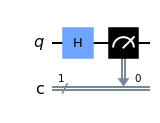

In [29]:
#importáljuk a qiskit-ben létrehozott különböző objektumokat
from qiskit import QuantumCircuit, execute, Aer

#létrehozunk egy kvantumáramkört 1 darab qubittel és 1 darab klasszikus bit-tel.
circuit = QuantumCircuit(1,1) #mostantól a circuit névvel valójában egy kvantumáramkörre tudunk hivatkozni

#az alábbi paranccsal egy H kaput tudunk hattatni az első qubitre 
circuit.h(0)
# VIGYÁZAT: az első qubitet továbbra is egy 0-val tudjuk megszólítani!
#(Ha circuit.h(qreg[1]) -et írok, akkor hibaüzenetet fogok kapni, mivel csak egy qubit van az áramkörben)

#most mérjük meg a qubitet az alábbi paranccsal:
circuit.measure(0,0)
#Ezen a ponton válik világossá, hogy miért van szükségünk klasszikus bitekre is:
#A mérésünk eredményét csakis klasszikus biteken tudjuk tárolni.

#Az áramkörökön végrehajtott manipulációk után érdemes kirajzolni az áramkört.
#Ezzel megbizonyosodhatunk róla, hogy nincsen hiba a kódunkban.
#Áramkör kirajzolásához szükséges parancs:
circuit.draw(output = 'mpl')

### Mit lehet kiolvasni ebből az ábrából? 

<img src="basic_circuit.png" width="600">

### Áramkör megmérése.

In [30]:
#Most mérjük meg az általunk elkészített kvantumáramkört.
#Ehhez létre kell hoznunk egy job-ot ("feladatot") a következő paranccsal:
job = execute(circuit , Aer.get_backend('qasm_simulator') , shots=1024)

#### Mi a parancs szerkeszete?

<ol>
<li>Az execute függvénynek meg kell adnunk, hogy pontosan melyik kvantumáramkör az amit meg szeretnénk mérni. Ez az első argumentumunk.</li>
<li>Azt is meg kell mondanunk, hogy milyen eszközön szeretnénk megmérni az áramkört. Mi most egy kvantumos szimulátort fogunk használni,
ami nem egy igazi kvantumszámítógép. A kvantumos szimulátorunkat az Aer.get_backend('qasm_simulator') paranccsal tudjuk megszólítani. 
Ez a második argumentum.</li>
<li>Az utolsó információ amit érdemes meghatároznunk az a shotok száma, vagyis az, hogy hányszor szeretnénk megmérni az áramkörünket.
    (Ez a kifejezés nem teljesen pontos, mivel valójában nem 1024-szer mérjük meg ugyanazt az áramkört, hanem 1024-szer hozzuk létre és mérjük meg az áramkört.)</li>
</ol>

### Eredmények kimutatása.

In [31]:
#Jelenleg a 'job' objektum tartalmazza a mérésünk eredményét, amit szeretnénk kinyerni ebből valahogyan.
#Ehhez mutat egy lehetséges példát az alábbi kód:

#a 'job' objektumból először kinyerjük az eredményeket: job.result().
#Majd ezekből az eredményekből kinyerjük azt az információt ami számunkra a leghasznosabb: job.result().get_counts()
#Ezzel megkapjuk azt az információt, hogy melyik mérési eredményt hányszor kaptuk meg a kísérletünk során.
counts = job.result().get_counts(circuit)

#kiíratjuk az eredményeket
print(counts)

{'0': 538, '1': 486}


### Értelmezzük az eredményeket.

State 0 is observed with frequency % 52.5390625
State 1 is observed with frequency % 47.4609375


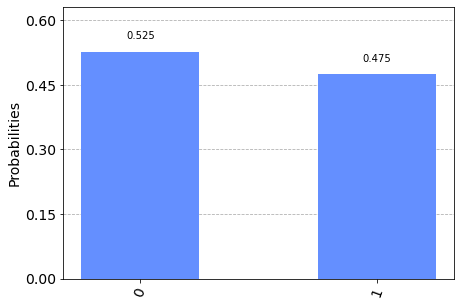

In [33]:
#Importáljunk egy hasznos módszert a vizualizációhoz.
#(Erről később több szó lesz.)
from qiskit.visualization import plot_histogram

#számoljuk meg, hogy hányszor mértünk 0-t és 1-et.
n_zeros = counts['0']
n_ones = counts['1']

#Írassuk ki, hogy a mérések hány százalékában melyiket mértük.
print("State 0 is observed with frequency %",100*n_zeros/(n_zeros+n_ones))
print("State 1 is observed with frequency %",100*n_ones/(n_zeros+n_ones))

plot_histogram(counts)

A mérések közel fele adott 0-ás eredményt a másik fele pedig 1-es eredményt. <br>
A most létrehozott áramkörünk valójában egy 'fair coin', amely 50\%-50\% valószínűséggel ad fejet vagy írást.<br>

## Feladatok

### 1. Egy qubites áramkör több kapuval <br>
<ol>
<li>Hozzunk létre egy kvantumáramkört 1 darab qubittel és 1 darab klasszikus bittel</li>
<li>Hassunk a qubitre a következő kapukkal (ilyen sorrendben): H, X, H</li>
<li>Mérjük meg az áramkört (measure parancs) és hajtsuk végre a mérést (execute parancs) 1024-szer.</li>
<li>Ábrázoljuk a mérési eredményeket hisztogrammon (plot_histogram)</li>
<li>Értelmezzük az eredményt.</li>
</ol>


Segítség: Az X kaput a Qiskit-ben 'x'-el jelöljük. <br>
Pl.: circuit.x(0) egy X kaput hattat az első qubiten.

In [ ]:
# a megoldásod helye
#
#
#

### 2. Több qubites áramkör (haladó)<br>
<ol>
<li> Próbáljuk meg értelmezni az alábbi több qubites áramkör rajzát.</li>
<li> Lehetne-e esetleg valahol egyszerűsíteni az áramkört? </li>
<li> Próbáljuk meg reprodukálni az egyszerűsített áramkört (vagy az eredetit) és rajzoljuk is ki azt.</li>
</ol>

Segítség: A CNOT kapu-nak két paramétere van (hiszen egy két qubites kapu). <br>
A Qiskitben ezt a következőképpen használjuk: circuit.cx(target_qubit,control_qubit), <br>
ahol target_qubit és control_qubit az áramkörben lévő qubitek sorszámait jelentik, amelyekre hattatjuk a CNOT kaput. <br>
Pl.: target_qubit $=$ 0, control_qubit $=$ 1 $\rightarrow$ circuit.cx(0,1)

<img src="2ndexercise_circuit_figure.png" width="600">

In [ ]:
# a megoldásod helye
#
#
#

#### Honnan fogom megtudni, hogy melyik kapu hogyan működik Qiskit-ben?
Szerencsére a Qiskit fejlesztői egy meglehetősen informatív dokumentációval segítik a tanulnivágyók dolgát.<br>
További információkért látogasd meg a Qiskit hivatalos oldalán elérhető dokumentációt:<br>
__[Egy qubites kapuk Qiskit-ben](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)__ 